In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_csv("housing.csv")
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
mean_bedrooms = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_bedrooms)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000')])

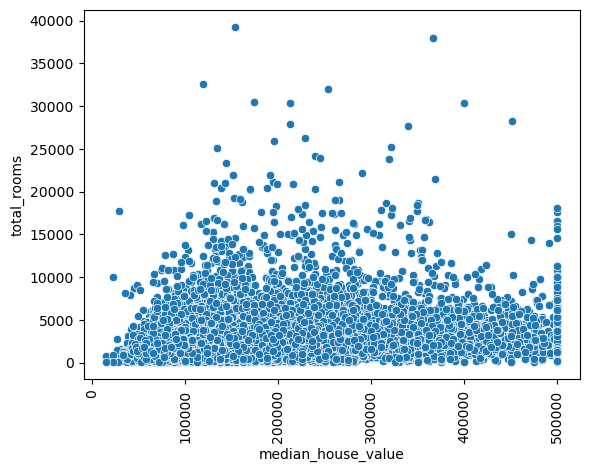

In [18]:
sns.scatterplot(x='median_house_value', y='total_rooms', data=df)
plt.xticks(rotation=90)

In [41]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['pop_per_household'] = df['population'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [31]:
df = df[df['median_house_value']<500001]
df = df[df['median_income']<15.0001]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19672 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            19672 non-null  float64
 1   latitude             19672 non-null  float64
 2   housing_median_age   19672 non-null  float64
 3   total_rooms          19672 non-null  float64
 4   total_bedrooms       19472 non-null  float64
 5   population           19672 non-null  float64
 6   households           19672 non-null  float64
 7   median_income        19672 non-null  float64
 8   median_house_value   19672 non-null  float64
 9   ocean_proximity      19672 non-null  object 
 10  rooms_per_household  19672 non-null  float64
 11  bedrooms_per_room    19472 non-null  float64
 12  pop_per_household    19672 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.1+ MB


In [40]:
corr_df = df.drop('ocean_proximity', axis=1)
corr_value = corr_df.corr()['median_house_value'].sort_values()
corr_value

latitude              -0.148456
longitude             -0.046477
pop_per_household     -0.021482
population             0.012165
housing_median_age     0.068228
total_bedrooms         0.074896
households             0.095130
rooms_per_household    0.108979
total_rooms            0.143363
bedrooms_per_room      0.320946
median_income          0.644152
median_house_value     1.000000
Name: median_house_value, dtype: float64

In [43]:
df_model = df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)
df_model = pd.get_dummies(df_model, columns=['ocean_proximity'], drop_first=True)

In [44]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [48]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
lasso_model = LassoCV(eps=0.001, n_alphas=10, cv=5)
lasso_model.fit(X_train_scaled, y_train)

c:\Users\njauc\miniconda3\envs\data\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1663: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
predictions = lasso_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

NotFittedError: This LassoCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
coeffs = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)